<a href="https://colab.research.google.com/github/snarkyidiot/Disney-Clone/blob/main/Copy_of_Tanisha_ASL_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import io
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
ds_asl_dir='/content/drive/MyDrive/asl_dataset'
asl_ds=tf.keras.preprocessing.image_dataset_from_directory(ds_asl_dir)

Found 2535 files belonging to 36 classes.


In [8]:
for image_batch, labels_batch in asl_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


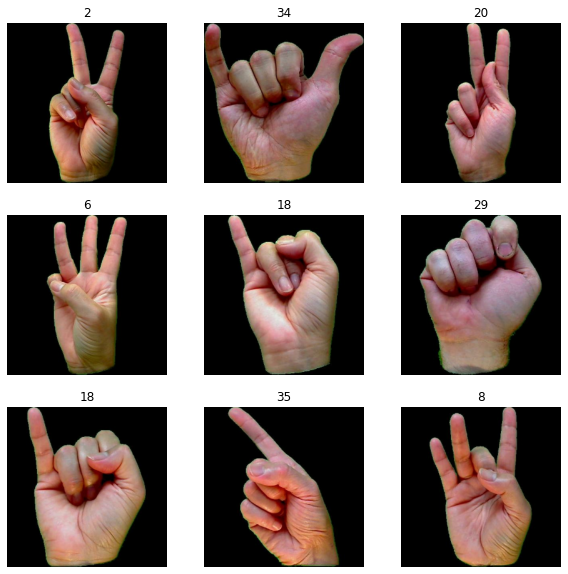

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in asl_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [19]:
batch_size = 32
img_height = 64
img_width = 64
from keras.preprocessing.image import ImageDataGenerator
data_augmentation = ImageDataGenerator(rotation_range=15, rescale=1/255, zoom_range=0.1, horizontal_flip=True,
                                       width_shift_range=0.1, height_shift_range=0.1, validation_split=0.2)


#Setting train/test split

asl_train_ds = data_augmentation.flow_from_directory(directory=ds_asl_dir, target_size=(img_height, img_width),
                                                     class_mode="categorical", batch_size=batch_size, subset="training")
asl_test_ds = data_augmentation.flow_from_directory(directory=ds_asl_dir, target_size=(img_height, img_width),
                                                    class_mode="categorical", batch_size=batch_size, subset="validation")

Found 2028 images belonging to 36 classes.
Found 507 images belonging to 36 classes.


In [20]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense

#Checking if the data format i.e the RGB channel is coming first or last so, whatever it may be, model will check first and then input shape will be feeded accordingly.

from keras import backend as K
if K.image_data_format() == "channels_first":
    input_shape = (3, img_height, img_width)
else:
    input_shape = (img_height, img_width, 3)

In [21]:
from keras.callbacks import ReduceLROnPlateau

In [22]:
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, AvgPool2D
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (64,64,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(AvgPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(AvgPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 36 , activation = 'softmax'))
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.5) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 75)        2100      
                                                                 
 batch_normalization_3 (Batc  (None, 64, 64, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 50)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 50)      

In [15]:

from keras.callbacks import EarlyStopping,ReduceLROnPlateau 
earlystop=EarlyStopping(patience=10)
learning_rate_reduce=ReduceLROnPlateau(monitor="val_accuracy",patience = 1, verbose=1,factor=0.5,min_lr=0.000001)
callbacks=[earlystop,learning_rate_reduce]

In [ ]:
 history = model.fit(asl_train_ds, validation_data=asl_test_ds, callbacks=callbacks, epochs=1000)

Epoch 1/1000
64/64 [==============================] - 676s 11s/step - loss: 727.4296 - accuracy: 0.0256 - val_loss: 15553187.0000 - val_accuracy: 0.0276 - lr: 0.5000
Epoch 2/1000
64/64 [==============================] - ETA: 0s - loss: 3.6987 - accuracy: 0.0261
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.25.
64/64 [==============================] - 66s 1s/step - loss: 3.6987 - accuracy: 0.0261 - val_loss: 2583224.7500 - val_accuracy: 0.0276 - lr: 0.5000
Epoch 3/1000
59/64 [==========================>...] - ETA: 4s - loss: 3.6536 - accuracy: 0.0236

In [ ]:
n_epochs = len(history.history['loss'])

In [ ]:
epochs = [i for i in range(n_epochs)]
fig , ax = plt.subplots(1,2)
train_acc = history.history[np.log('accuracy')]
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()
